In [1]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)

# read the database
db <- read_airr("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv")
glimpse(db)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 3,042
Columns: 62
$ sequence_id               <chr> "ACGATACTCAACGCTA-1_contig_2", "TGGCCAGTCTC…
$ sequence                  <chr> "ACTGTTCTCTTTACAGTTACTGAGCACACAGGACCTCACCAT…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-72*01", "IGHV1-62-2*01,IGHV1-71*01",…
$ d_call                    <chr> "IGHD1-1*01", NA, "IGHD2-1*01,IGHD2-13*01,I…
$ j_call                    <chr> "IGHJ4*01", "IGHJ4*01", "IGHJ2*01", "IGHJ4*…
$ sequence_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAG…
$ germline_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAG…
$ junction                  <chr> "TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG…
$ junction_aa               <chr> "CARLGGYGNAMDYW", "CARHEEDYYAMDYW", "CTRDST…
$ v_cigar                   <chr> "97S294=", "112S302=", "117S294=", "72S299=…
$ d_cigar                   

In [2]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 4 x 4
  clone_id  data       locus  seqs
  <chr>     <list>     <chr> <int>
1 2550_1945 <airrClon> IGH       2
2 280_508   <airrClon> IGH       2
3 373_817   <airrClon> IGH       2
4 397_555   <airrClon> IGH       2


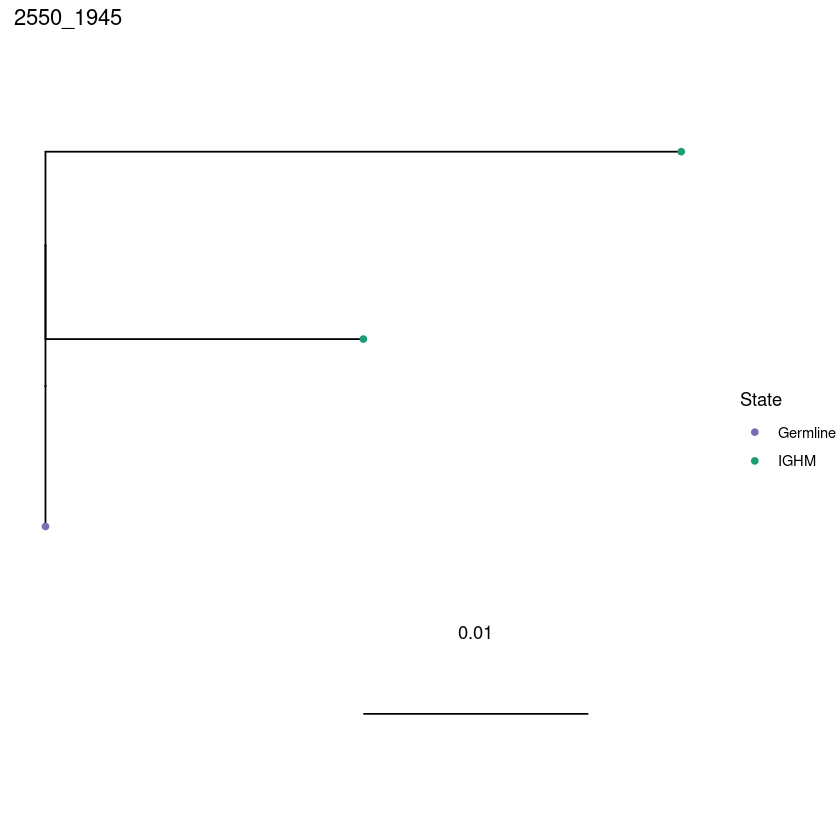

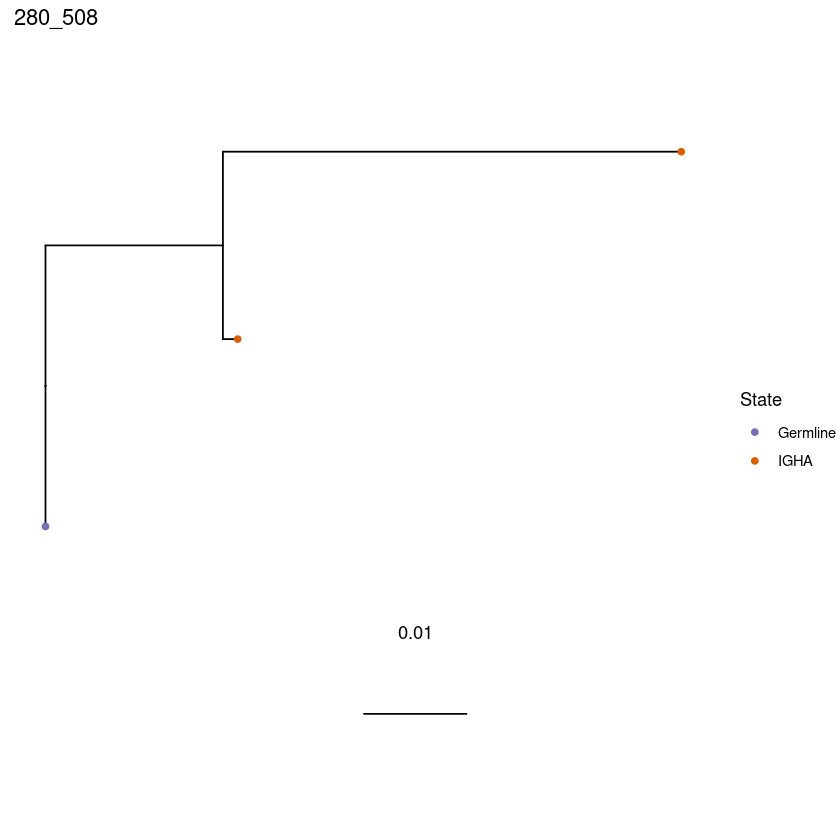

[[1]]

[[2]]

[[3]]

[[4]]


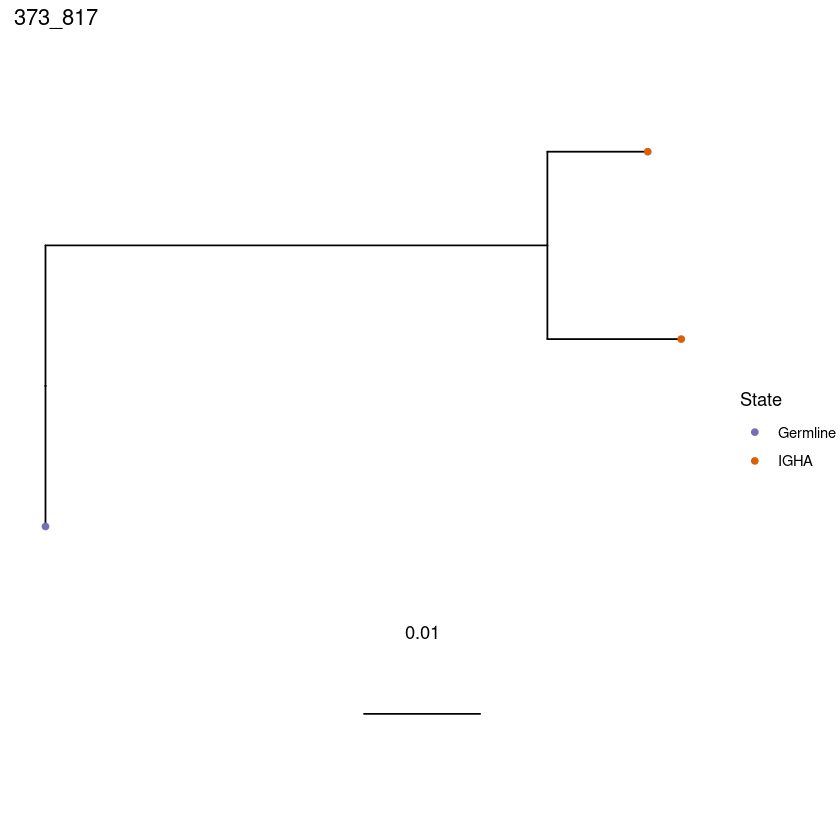

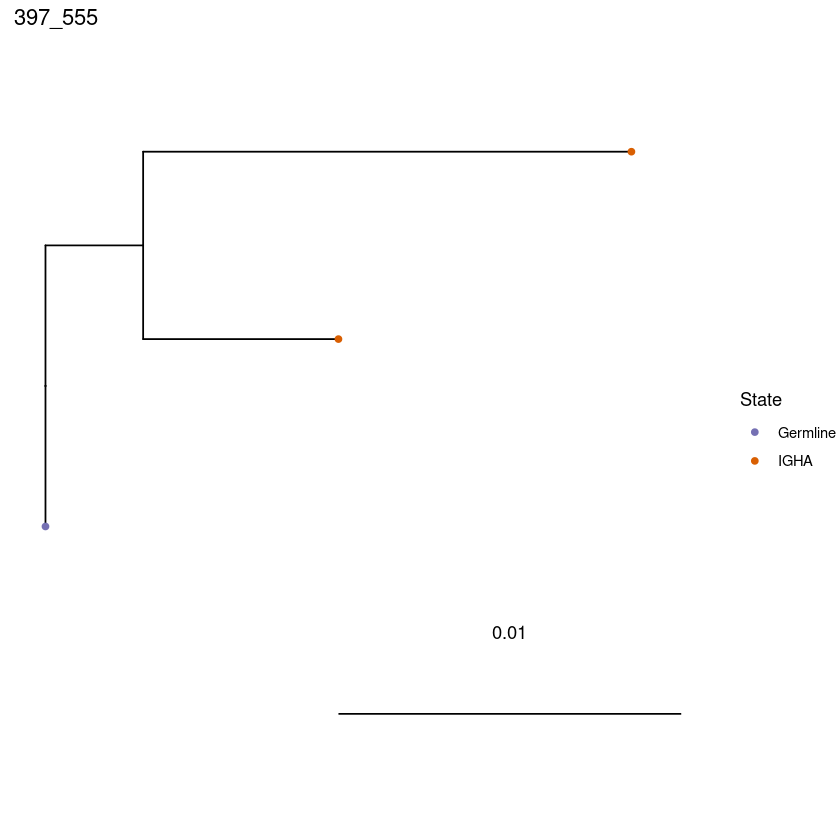

In [3]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

# simple tree plotting with ggtree R package with isotypes at tips
plotTrees(trees, nodes = FALSE, tips="c_call")

In [4]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id  data                                                    locus seqs
1 2550_1945 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
2 280_508   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
3 373_817   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
4 397_555   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
  trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

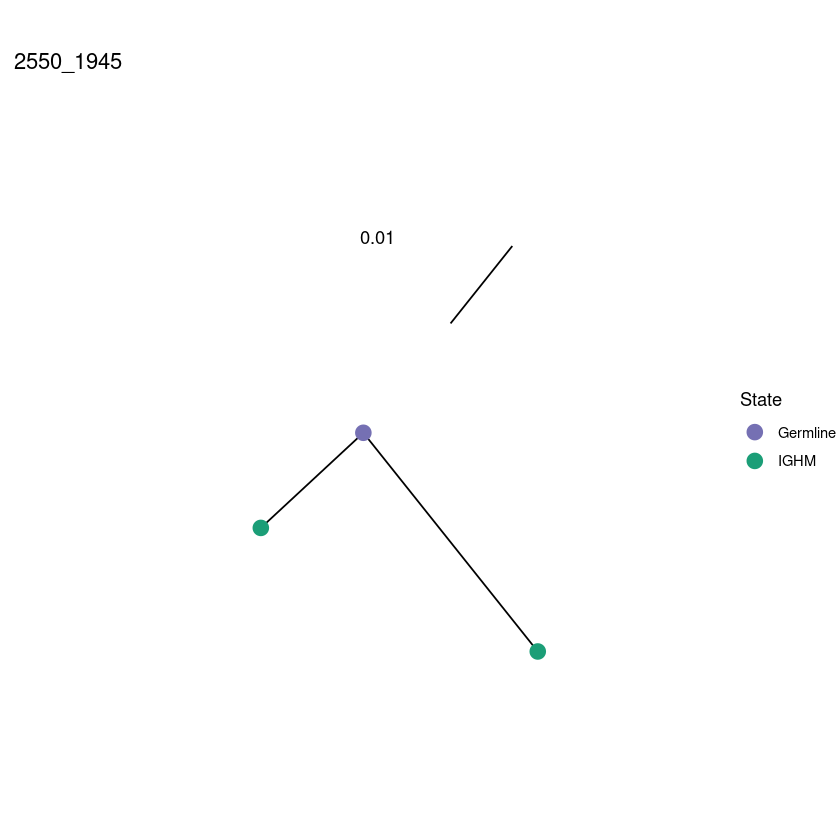

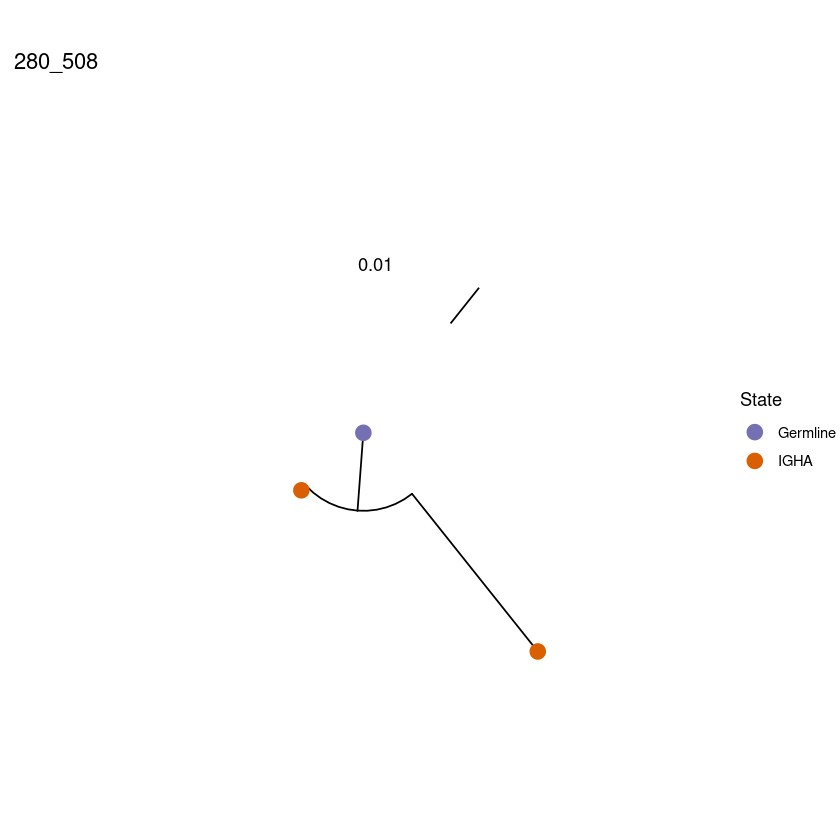

[[1]]

[[2]]

[[3]]

[[4]]


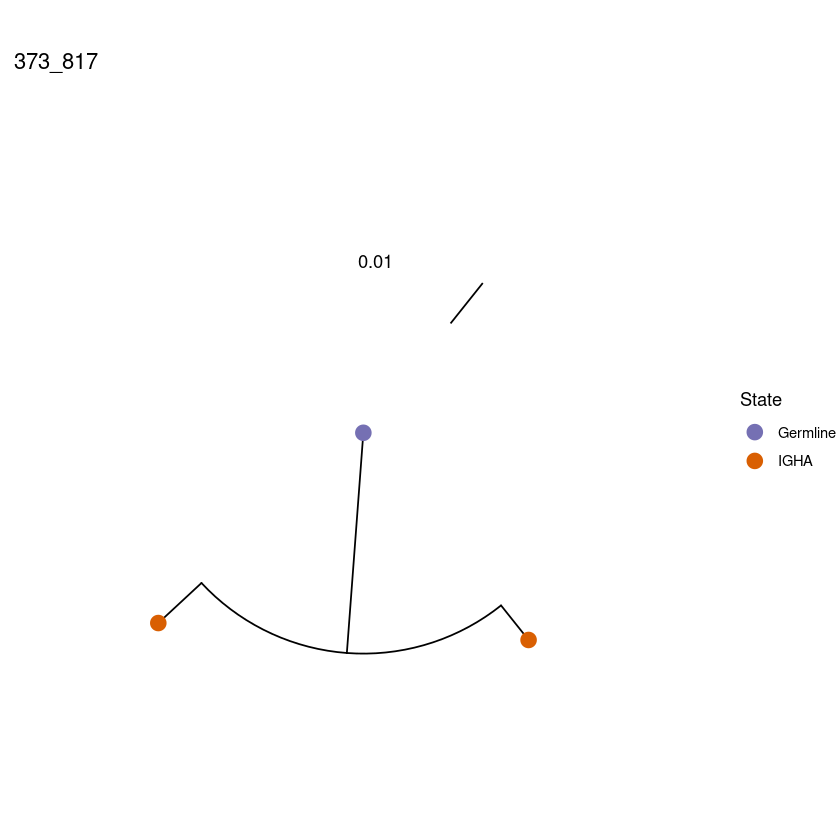

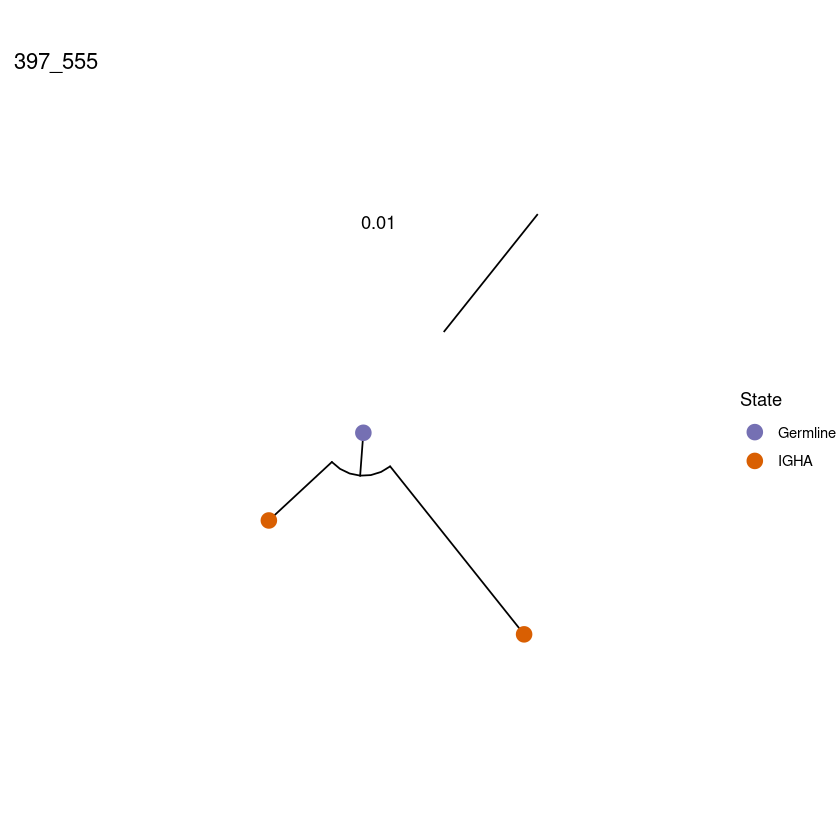

In [5]:
plotTrees(trees, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE, layout = "circular")